In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("merc.csv")

In [3]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,SLK,2005,5200,Automatic,63000,Petrol,325,32.1,1.8
1,S Class,2017,34948,Automatic,27000,Hybrid,20,61.4,2.1
2,SL CLASS,2016,49948,Automatic,6200,Petrol,555,28.0,5.5
3,G Class,2016,61948,Automatic,16000,Petrol,325,30.4,4.0
4,G Class,2016,73948,Automatic,4000,Petrol,325,30.1,4.0


In [4]:
df.info

<bound method DataFrame.info of             model  year  price transmission  mileage fuelType  tax   mpg  \
0             SLK  2005   5200    Automatic    63000   Petrol  325  32.1   
1         S Class  2017  34948    Automatic    27000   Hybrid   20  61.4   
2        SL CLASS  2016  49948    Automatic     6200   Petrol  555  28.0   
3         G Class  2016  61948    Automatic    16000   Petrol  325  30.4   
4         G Class  2016  73948    Automatic     4000   Petrol  325  30.1   
...           ...   ...    ...          ...      ...      ...  ...   ...   
13114     C Class  2020  35999    Automatic      500   Diesel  145  55.4   
13115     B Class  2020  24699    Automatic     2500   Diesel  145  55.4   
13116   GLC Class  2019  30999    Automatic    11612   Diesel  145  41.5   
13117   CLS Class  2019  37990    Automatic     2426   Diesel  145  45.6   
13118     S Class  2019  54999    Automatic     2075   Diesel  145  52.3   

       engineSize  
0             1.8  
1             2

In [5]:
df.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [6]:
df['model'].unique()

array([' SLK', ' S Class', ' SL CLASS', ' G Class', ' GLE Class',
       ' GLA Class', ' A Class', ' B Class', ' GLC Class', ' C Class',
       ' E Class', ' GL Class', ' CLS Class', ' CLC Class', ' CLA Class',
       ' V Class', ' M Class', ' CL Class', ' GLS Class', ' GLB Class',
       ' X-CLASS', '180', ' CLK', ' R Class', '230', '220', '200'],
      dtype=object)

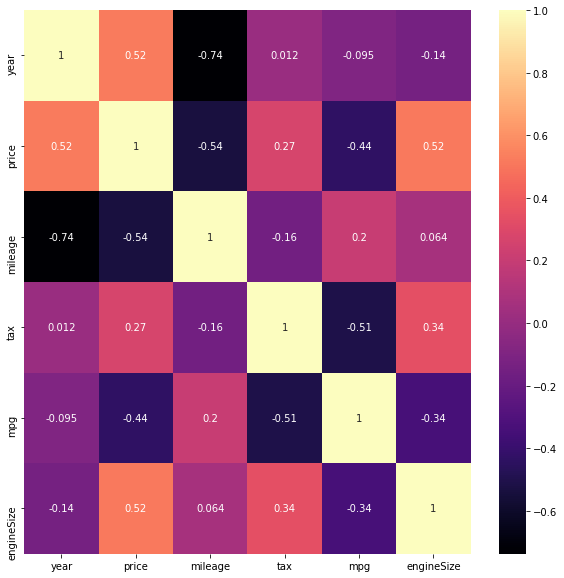

In [7]:
data=df.corr()
corr_features=data.index
plt.figure(figsize=(10,10))
h=sns.heatmap(df[corr_features].corr(),annot=True,cmap='magma')

## Comparison between all Models and Prices 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 [Text(0, 0, ' SLK'),
  Text(1, 0, ' S Class'),
  Text(2, 0, ' SL CLASS'),
  Text(3, 0, ' G Class'),
  Text(4, 0, ' GLE Class'),
  Text(5, 0, ' GLA Class'),
  Text(6, 0, ' A Class'),
  Text(7, 0, ' B Class'),
  Text(8, 0, ' GLC Class'),
  Text(9, 0, ' C Class'),
  Text(10, 0, ' E Class'),
  Text(11, 0, ' GL Class'),
  Text(12, 0, ' CLS Class'),
  Text(13, 0, ' CLC Class'),
  Text(14, 0, ' CLA Class'),
  Text(15, 0, ' V Class'),
  Text(16, 0, ' M Class'),
  Text(17, 0, ' CL Class'),
  Text(18, 0, ' GLS Class'),
  Text(19, 0, ' GLB Class'),
  Text(20, 0, ' X-CLASS'),
  Text(21, 0, '180'),
  Text(22, 0, ' CLK'),
  Text(23, 0, ' R Class'),
  Text(24, 0, '230'),
  Text(25, 0, '220'),
  Text(26, 0, '200')])

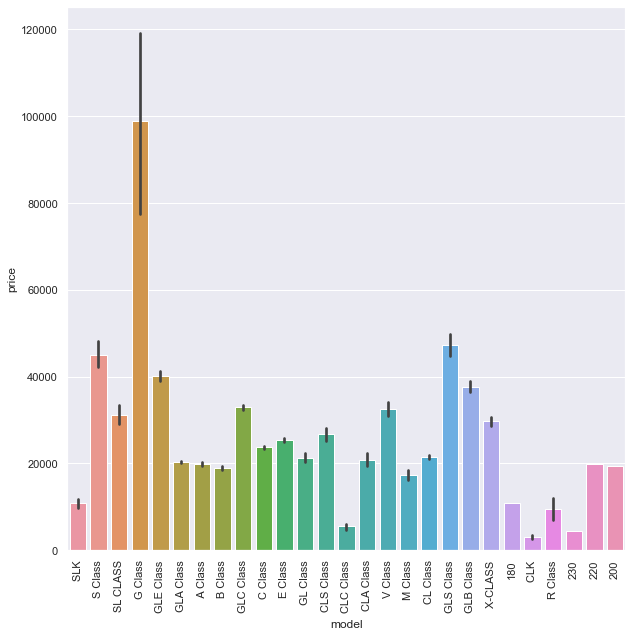

In [8]:
sns.set(style="darkgrid")
plt.figure(figsize=(10,10))
sns.barplot(x='model',y='price',data=df)
plt.xticks(rotation=90)

## Prices in different years

<Figure size 1440x720 with 0 Axes>

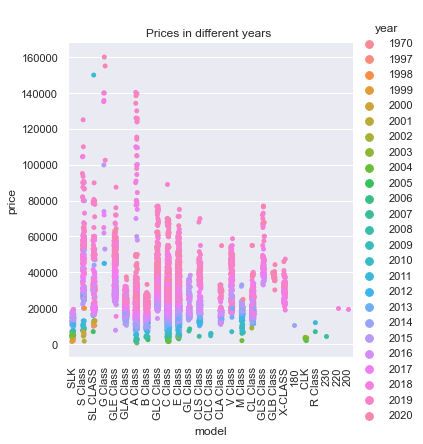

In [9]:
plt.figure(figsize=(20,10))
sns.catplot(x="model",y='price',hue="year", data=df) 
plt.xticks(rotation=90)
plt.title("Prices in different years ")
plt.show() 

 Some models are more Classic so that the prices also various in different years

In [10]:
df.sample(frac=1).head()


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
9150,C Class,2019,24699,Semi-Auto,13662,Petrol,145,46.3,1.5
4847,C Class,2019,41500,Semi-Auto,2317,Petrol,145,29.4,3.0
6518,E Class,2015,18495,Automatic,29940,Diesel,160,50.4,3.0
6042,GLA Class,2014,15950,Semi-Auto,25678,Diesel,30,62.8,2.1
3128,C Class,2017,17280,Semi-Auto,42294,Diesel,145,64.2,2.1


In [11]:
(df.describe(percentiles=[.01, .25, .5, .75, .99]).apply( 
    lambda s: s.apply('{0:.2f}'.format)))

,year,price,mileage,tax,mpg,engineSize
count,13119.00,13119.00,13119.00,13119.00,13119.00,13119.00
mean,2017.30,24698.60,21949.56,129.97,55.16,2.07
std,2.22,11842.68,21176.51,65.26,15.22,0.57
min,1970.00,650.00,1.00,0.00,1.10,0.00
1%,2010.00,6999.00,16.00,0.00,27.24,1.30
25%,2016.00,17450.00,6097.50,125.00,45.60,1.80
50%,2018.00,22480.00,15189.00,145.00,56.50,2.00
75%,2019.00,28980.00,31779.50,145.00,64.20,2.10
99%,2020.00,65990.00,94804.22,325.00,80.70,4.00
max,2020.00,159999.00,259000.00,580.00,217.30,6.20


## Most used fuel types

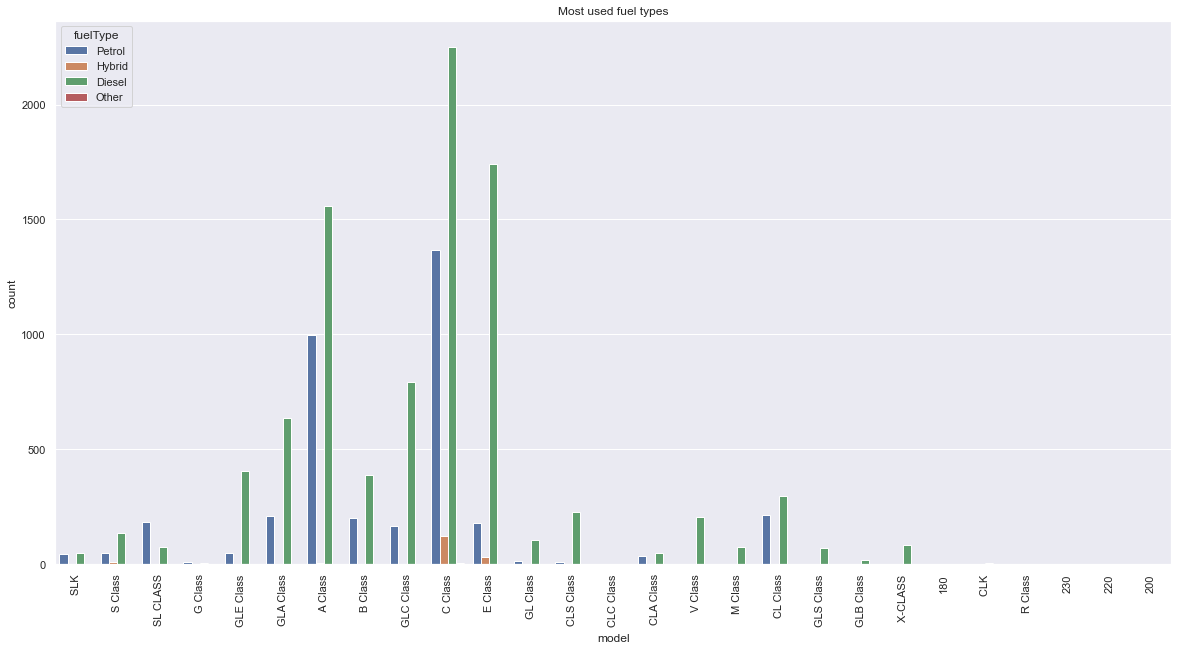

In [12]:
plt.figure(figsize=(20,10))
sns.countplot(x="model", hue="fuelType", data=df) 
plt.xticks(rotation=90)
plt.title("Most used fuel types")
plt.show() 


In [13]:
df['fuelType'].unique()

array(['Petrol', 'Hybrid', 'Diesel', 'Other'], dtype=object)

In [14]:
df['fuelType'] = df['fuelType'].replace('Hybrid','Other')

In [15]:
df['fuelType'].unique()

array(['Petrol', 'Other', 'Diesel'], dtype=object)

 Here these all models use Petrol,Hybrid,Disel,Other as fuels. As we can see number of Hybrid and other fuels is less number in use.So I rename hybrid in other

## Percentage of Fuels 

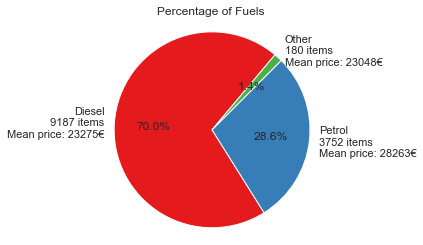

In [16]:
fuels = pd.DataFrame(df['fuelType'].value_counts()) 
group = df.groupby(df['fuelType']) 
mean_price = pd.DataFrame(group.price.mean())
fuels.reset_index(level=0, inplace=True) 
fuels.columns = ('fuelType', 'size') 
fuels = pd.merge(fuels,mean_price,how='left', on='fuelType') 
 
labels = ["%s\n%d items\nMean price: %d€"% (label) for label in 
    zip(fuels['fuelType'], fuels['size'], fuels['price'])] 
fig1, ax1 = plt.subplots() 
ax1.pie(fuels['size'], labels=labels, 
    autopct='%1.1f%%', startangle=50, colors=plt.cm.Set1.colors) 
ax1.axis('equal') 
plt.title("Percentage of Fuels ")
plt.show()

 From pie chart of fuels I found that most of the models use Diesel(70%)

Text(0.5, 1.0, 'Miles per gallon')

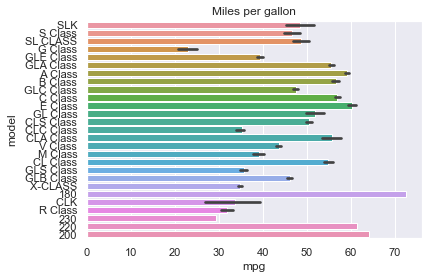

In [17]:
ax = sns.barplot(x="mpg", y="model", data=df)
plt.title("Miles per gallon")

MPG, or miles per gallon, is the distance, measured in miles, that a car can travel per gallon of fuel. MPG is also the primary measurement of a car's fuel efficiency: The higher a car's MPG, the more fuel efficient it is.From this horizontal barplot we can see the 180 model is more fuel efficient 

## Visualize of Engine size

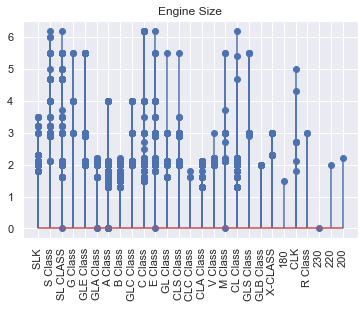

In [18]:
x = df['model']
y = df['engineSize']

plt.stem(x, y)
plt.xticks(rotation=90)
plt.title('Engine Size')
plt.show()

Engine size is the volume of fuel and air that can be pushed through a car's cylinders and is measured in cubic centimetres (cc). Car engine sizes are normally specified in litres, which is rounded up to the nearest tenth of a litre

### Conclusion

We can easily visualize which car is better in MPG,engine size and fuel type.So we can easily classify the best model of this used Mercedes cars.We also know the models prices in different yeas and mostly diesel is used as fuel.